In [ ]:
#I wanted to do something with Linkedin to calculate share of safety-related employees in leading AI labs but LinkedIn gives issues, so turned to analysing Italian budget law and the most cited words and topics
# search OpenAI employees that work on Safety: https://www.linkedin.com/search/results/people/?currentCompany=%5B%2211130470%22%5D&sid=bjY&titleFreeText=Safety
# search Anthropic employees that work on Safety: https://www.linkedin.com/search/results/people/?currentCompany=%5B%2274126343%22%5D&origin=FACETED_SEARCH&sid=k3q&titleFreeText=Safety
# search GDM employees that work on Safety: https://www.linkedin.com/search/results/people/?currentCompany=%5B%221594050%22%5D&origin=FACETED_SEARCH&sid=bjY&titleFreeText=Safety
# search GDM employees in total: https://www.linkedin.com/search/results/people/?currentCompany=%5B%221594050%22%5D&origin=FACETED_SEARCH&sid=nv-

#to find result
#<div id="8x+t29OgS4aEisFwRYpxFQ==">
#          <h2 class="pb2 t-black--light t-14">
#            <!---->
#              <div>
#                  <!---->24 results<!---->
#              </div>
#                  <!---->
#          </h2>
#</div>

In [ ]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 14.4 MB/s eta 0:00:00


In [ ]:
pip install webdriver-manager

https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.versione=1&art.idGruppo=1&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idArticolo=1&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18&art.progressivo=1#art

https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.versione=1&art.idGruppo=1&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idArticolo=1&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18&art.progressivo=2#art

articolo 1 è progressivo fino a 21

https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.versione=1&art.idGruppo=2&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idArticolo=2&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18&art.progressivo=0#art

https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.versione=1&art.idGruppo=2&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idArticolo=3&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18&art.progressivo=0#art

https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.versione=1&art.idGruppo=2&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idArticolo=21&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18&art.progressivo=0#art


idArticolo =1
art.progressivo=1 to 21 for art 1

idArticolo = 2 to 21
art.progressivo=0

In [ ]:
import json
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

# Ensure required NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('italian'))

# Initialize Selenium WebDriver
def initialize_driver():
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    return webdriver.Chrome(options=chrome_options)

# Scrape text from the URL
def scrape_data(driver, url):
    try:
        driver.get(url)
        time.sleep(5)  # Allow JavaScript to load
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        pre_tags = soup.find_all('pre')
        text = "\n".join(tag.get_text(strip=True) for tag in pre_tags)
        return text
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return ""

# Process text to filter out stop words, numbers, and small words
def process_text(text):
    tokenizer = RegexpTokenizer(r'\b\w{3,}\b')  # Tokenize words with 3+ characters
    words = tokenizer.tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words and not word.isdigit()]
    return filtered_words

# Main function to scrape multiple URLs and save results to JSON
def main():
    driver = initialize_driver()
    try:
        base_url = "https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo"
        codice_redazionale = "24A00001"
        data_pubblicazione = "2024-01-18"

        # Prepare URLs to scrape
        urls = []

        # Article 1 with progressivo from 1 to 21
        for progressivo in range(1, 22):
            url = (
                f"{base_url}?art.idArticolo=1&art.progressivo={progressivo}&art.versione=1&"
                f"art.idGruppo=1&art.flagTipoArticolo=0&art.codiceRedazionale={codice_redazionale}&"
                f"art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta={data_pubblicazione}"
            )
            urls.append(url)

        # Articles 2 to 21 with progressivo = 0
        for id_articolo in range(2, 22):
            url = (
                f"{base_url}?art.idArticolo={id_articolo}&art.progressivo=0&art.versione=1&"
                f"art.idGruppo=2&art.flagTipoArticolo=0&art.codiceRedazionale={codice_redazionale}&"
                f"art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta={data_pubblicazione}"
            )
            urls.append(url)

        # Scrape and process text
        all_words = []
        for idx, url in enumerate(urls, start=1):
            print(f"Processing URL {idx}/{len(urls)}: {url}")
            raw_text = scrape_data(driver, url)
            if raw_text:
                words = process_text(raw_text)
                all_words.extend(words)

        # Calculate word frequencies
        word_frequencies = Counter(all_words)

        # Save to JSON words with frequencies
        dataset = [{"word": word, "frequency": freq} for word, freq in word_frequencies.items()]
        output_file = "scraped_data_with_frequencies.json"
        with open(output_file, "w", encoding="utf-8") as f:
            json.dump(dataset, f, ensure_ascii=False, indent=4)
        print(f"Data saved to {output_file}")


        #Save JSON without frequencies
        dataset = all_words
        output_file = "scraped_data_without_freq.json"
        with open(output_file, "w", encoding="utf-8") as f:
            json.dump(dataset, f, ensure_ascii=False, indent=4)
        print(f"Data saved to {output_file}")

    finally:
        driver.quit()

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing URL 1/41: https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.idArticolo=1&art.progressivo=1&art.versione=1&art.idGruppo=1&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18
Processing URL 2/41: https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.idArticolo=1&art.progressivo=2&art.versione=1&art.idGruppo=1&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18
Processing URL 3/41: https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.idArticolo=1&art.progressivo=3&art.versione=1&art.idGruppo=1&art.flagTipoArticolo=0&art.codiceRedazionale=24A00001&art.idSottoArticolo=1&art.idSottoArticolo1=10&art.dataPubblicazioneGazzetta=2024-01-18
Processing URL 4/41: https://www.gazzettaufficiale.it/atto/serie_generale/caricaArticolo?art.idArticolo=1&art.progr

In [ ]:
import pandas as pd
from collections import Counter

# List of words to filter out
filter_words = [
    "comma", "articolo", "legge", "decreto", "anno", "euro", "dicembre", "presente", "stato",
    "modificazioni", "milioni", "bis", "sensi", "periodo", "convertito", "ministero", "fondo",
    "ministro", "legislativo", "risorse", "attivita", "nonche", "disposizioni", "entro", "data",
    "bilancio", "testo", "lettera", "essere", "spesa", "art", "cento", "fine", "anni", "agosto", 'economia', 'finanze', 'personale',
    "nazionale", "commi", "modalita", "enti", "note", "luglio", "presidente", "decorrere", "caso",
    "materia", "secondo", "consiglio", "base", "regioni", "entrata", "amministrazioni", "parte",
    "fino", "soggetti", "seguenti", "fini", "previsione", "puo", "marzo", "riporta", "primo",
    "possono", "gennaio", "giugno", "attuazione", "servizi", "pari", "pubblica", "previsto",
    "comuni", "importo", "mediante", "ovvero", "maggio", "ministri", "imprese", "ter",
    "amministrazione", "vigore", "agenzia", "limite", "medesimo", "oneri", "valore", "politiche", 'nazionale', 'interventi',
    "provvede", "misure", "relativi", "rispetto", "omissis", "superiore", "conto", "ambito",
    "gestione", "ottobre", "giorni", "derivanti", "aprile", "riferimento", "previsti", "servizio",
    "spese", "misura", "finanziario", "settembre", "trattamento", "ogni", "repubblica", "relative",
    "economico", "parole", "previste", "limiti", "unico", "novembre", "criteri", "interno",
    "province", "contributo", "pubbliche", "relazione", "comunque", "successive", "contratti",
    "finanziamento", "piu", "titolo", "pubblici", "decreti", "esercizio", "funzioni",
    "applicazione", "concerto", "quota", "requisiti", "entrate", "carico", "codice", "tale",
    "riduzione", "conferenza", "altri", "applicano", "quali", "mesi", "unita", "massimo", "favore",
    "precedente", "generale", "termine", "beni", "procedure", "regolamento", "finanziarie",
    "straordinario", "sede", "urgenti", "finalita", "commissario", "presso", "civile", "somme",
    "ciascun", "finanza", "garanzia", "contributi", "febbraio", "piano", "stesso", "programma",
    "accesso", "gia", "pagamento", "articoli", "complessivo", "predetto", "ciascuno", "prima",
    "altresi", "termini", "ivi", "qualora", "realizzazione", "livello", "annui", "vigente",
    "ente", "diritto", "quater", "rapporti", "citato", "sistema", "fondi", "formazione", "dati",
    "regione", "dotazione", "autonome", "numero", "pubblico", "dipartimento", "finanziaria",
    "settore", "disponibili", "corrispondente", "tempo", "prestazioni", "autorizzato", "triennio",
    "lettere", "attraverso", "accordo", "sostituite", "valere", "autorizzata", "contratto",
    "condizioni", "disposizione", "dopo", "deroga", "restando", "cessione", "applica", "senza",
    "finanziari", "corso", "ulteriori", "seguente", "obiettivi", "eventuali", "pluriennale",
    "acquisto", "ricerca", "previa", "durata", "inferiore", "almeno", "effetti", "costo",
    "verifica", "istituito", "eventi", "tre", "trento", "europea", "operazioni", "dipendenti",
    "commissione", "oggetto", "recante", "sostegno", "medesima", "relativo", "comune",
    "monitoraggio", "competenza", "rapporto", "indennita", "ammontare", "opere", "intesa",
    "disciplina", "propri", "medesimi", "dichiarazione", "economica", "prevista", "altre",
    "netto", "costi", "proposta", "ciascuna", "forze", "persone", "provvedimento", "assicurare",
    "indicati", "quinquies", "garantire", "richiesta", "ufficiale", "speciale", "sicurezza",
    "utilizzo", "amministrativa", "seguito", "citta", "capitale", "determinato", "tali",
    "modificato", "gazzetta", "destinate", "concessione", "lavori", "autorizzazione"
]

# Load the dataset
data = pd.read_json('scraped_data_with_frequencies.json')

# Remove the filtered words
data = data[~data['word'].isin(filter_words)]

# Display the top 20 words
print(data)


              word  frequency
0       avvertenza          4
3              qui          2
4       pubblicato        104
6          redatto          7
8       competente         88
...            ...        ...
10255  emendamenti          1
10256       votata          1
10257        diano          1
10258          29e          1
10259    assegnano          1

[9959 rows x 2 columns]


In [ ]:
import json
from collections import Counter

# Get the top 20 words by frequency
data.sort_values(by='frequency', ascending=False).head(20)


,word,frequency
136,economia,730
498,interventi,726
137,finanze,714
500,personale,665
133,lavoro,630
342,imposta,600
420,sviluppo,309
689,locali,305
135,sociali,299
435,societa,291


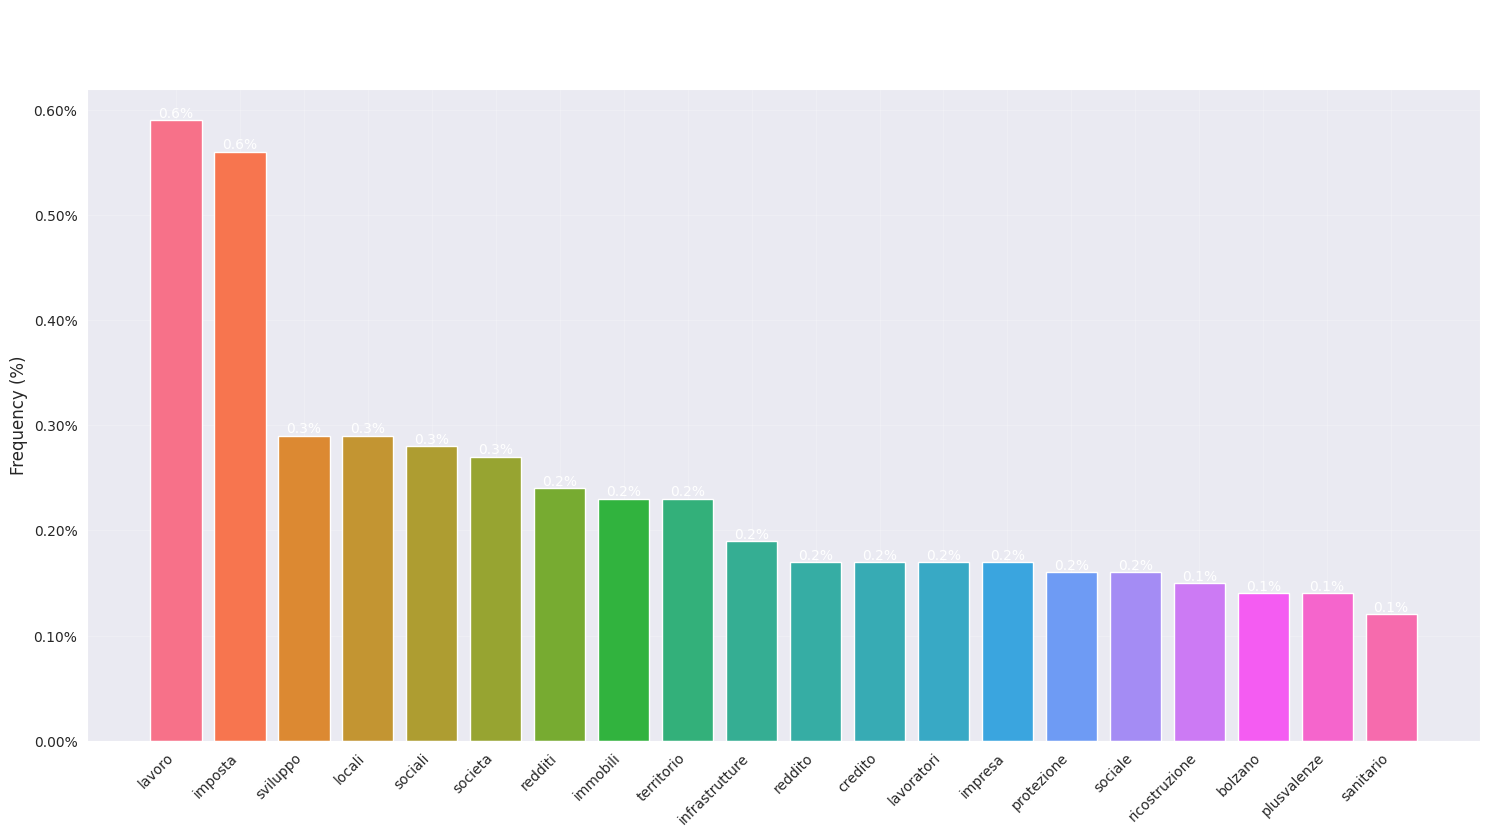

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
from matplotlib.ticker import PercentFormatter

# Set the style and font settings
plt.style.use('dark_background')  # Using dark_background instead of seaborn-darkgrid
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    stop_words = set(stopwords.words('italian'))
    all_filter_words = stop_words.union(filter_words)  # using your existing italian_procedural_words

    words = text.split()
    words = [word for word in words if word not in all_filter_words
            and len(word) > 2
            and not any(char.isdigit() for char in word)]

    return words

# Load and process data
with open("scraped_data_without_freq.json", "r", encoding="utf-8") as f:
    data = json.load(f)

all_words = []
for text in data:
    all_words.extend(preprocess_text(text))

word_freq = Counter(all_words)
top_words = dict(word_freq.most_common(20))

# Create DataFrame and calculate percentages
df = pd.DataFrame(list(top_words.items()), columns=['Parola', 'Frequenza'])
total_words = sum(word_freq.values())
df['Percentuale'] = (df['Frequenza'] / total_words * 100).round(2)

# Create the visualization
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0])

fig.suptitle('Keywords in the Italian annual budget law', fontsize=16, y=0.95, color='white')

# Color palette
colors = sns.color_palette("husl", n_colors=len(df))

# Main bar plot
bars = ax1.bar(df.index, df['Percentuale'], color=colors)
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Parola'], rotation=45, ha='right')
ax1.set_ylabel('Frequency (%)')
ax1.yaxis.set_major_formatter(PercentFormatter())
ax1.grid(True, alpha=0.2)

# Add percentage labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height,
             f'{df["Percentuale"][i]:.1f}%',
             ha='center', va='bottom', fontsize=10, color='white')

# Add subtitle
ax1.text(-0.5, ax1.get_ylim()[1] * 1.1,
         'Le 20 parole tematiche più frequenti nel testo',
         fontsize=12, style='italic', color='white')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1)

# Show plot
plt.show()

In [ ]:
# Create a dictionary with the plot data
plot_data = {
    "visualization": {
        "title": "Keywords in the Italian annual budget law",
        "subtitle": "Le 20 parole tematiche più frequenti nel testo",
        "type": "bar_chart"
    },
    "data": {
        "words": df['Parola'].tolist(),
        "frequencies": df['Frequenza'].tolist(),
        "percentages": df['Percentuale'].tolist()
    },
    "statistics": {
        "total_unique_words": len(word_freq),
        "total_words_analyzed": total_words
    }
}

# Save to JSON file
with open('plot_keywords.json', 'w', encoding='utf-8') as f:
    json.dump(plot_data, f, ensure_ascii=False, indent=4)

# Print confirmation
print("Plot data has been saved to 'cc5_data.json'")

Plot data has been saved to 'cc5_data.json'


In [ ]:
import json
import pandas as pd
import altair as alt
from IPython.display import HTML

# Enable rendering in notebook/colab environment
alt.renderers.enable('default')

# Load the data
with open('cc5_data.json', 'r', encoding='utf-8') as f:
    plot_data = json.load(f)

# Create a DataFrame from the JSON data
df = pd.DataFrame({
    'word': plot_data['data']['words'],
    'frequency': plot_data['data']['frequencies'],
    'percentage': plot_data['data']['percentages']
})

# Calculate max percentage for setting axis limits
max_percentage = df['percentage'].max()
tick_step = max_percentage / 5  # Show 5 ticks

# Create the Altair chart
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('word:N',
            sort='-y',
            axis=alt.Axis(
                labelAngle=-45,
                title='Keywords'
            )),
    y=alt.Y('percentage:Q',
            axis=alt.Axis(
                title='Frequency (%)',
                format=',.1f',
                tickCount=6  # Reduce number of ticks
            )),
    color=alt.Color('percentage:Q',
                    scale=alt.Scale(scheme='viridis'),
                    legend=alt.Legend(title='Percentage')),
    tooltip=[
        alt.Tooltip('word:N', title='Word'),
        alt.Tooltip('frequency:Q', title='Count', format=','),
        alt.Tooltip('percentage:Q', title='Percentage', format='.1f')
    ]
).properties(
    title={
        'text': 'Keywords in the Italian Annual Budget Law',
        'subtitle': 'Top 20 most frequent thematic words',
        'fontSize': 20,
        'subtitleFontSize': 14
    },
    width=800,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    anchor='start'
)

# Save the chart specification to JSON
chart_json = chart.to_json(indent=2)
with open('cc5_chart.json', 'w', encoding='utf-8') as f:
    json.dump(json.loads(chart_json), f, indent=2)

# Display the chart
display(chart)

print("File saved: cc5_chart.json - Chart specification")

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

File saved: cc5_chart.json - Chart specification


In [ ]:
import json
import pandas as pd
import altair as alt
import spacy
from collections import defaultdict

# Download Italian language model if not already installed
!python -m spacy download it_core_news_sm

# Load Italian language model
nlp = spacy.load('it_core_news_sm')

# Load the data
with open('cc5_data.json', 'r', encoding='utf-8') as f:
    plot_data = json.load(f)

# Create initial DataFrame
df_initial = pd.DataFrame({
    'word': plot_data['data']['words'],
    'frequency': plot_data['data']['frequencies'],
    'percentage': plot_data['data']['percentages']
})

# Function to get lemma for a word
def get_lemma(word):
    doc = nlp(word)
    return doc[0].lemma_

# Group similar words
word_groups = defaultdict(lambda: {'words': [], 'total_freq': 0, 'total_percentage': 0})

for _, row in df_initial.iterrows():
    lemma = get_lemma(row['word'])
    word_groups[lemma]['words'].append(row['word'])
    word_groups[lemma]['total_freq'] += row['frequency']
    word_groups[lemma]['total_percentage'] += row['percentage']

# Create new DataFrame with grouped words
grouped_data = []
for lemma, data in word_groups.items():
    grouped_data.append({
        'lemma': lemma,
        'words': ', '.join(data['words']),
        'frequency': data['total_freq'],
        'percentage': data['total_percentage']
    })

df_grouped = pd.DataFrame(grouped_data)
df_grouped = df_grouped.sort_values('percentage', ascending=False).head(20)

# Create the Altair chart with grouped data
chart = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('lemma:N',
            sort='-y',
            axis=alt.Axis(
                labelAngle=-45,
                title='Grouped Keywords'
            )),
    y=alt.Y('percentage:Q',
            axis=alt.Axis(
                title='Combined Frequency (%)',
                format=',.1f',
                tickCount=6
            )),
    color=alt.Color('percentage:Q',
                    scale=alt.Scale(scheme='viridis'),
                    legend=alt.Legend(title='Percentage')),
    tooltip=[
        alt.Tooltip('lemma:N', title='Base Word'),
        alt.Tooltip('words:N', title='Related Words'),
        alt.Tooltip('frequency:Q', title='Total Count', format=','),
        alt.Tooltip('percentage:Q', title='Combined Percentage', format='.1f')
    ]
).properties(
    title={
        'text': 'Grouped Keywords in the Italian Annual Budget Law',
        'subtitle': 'Similar words combined by their base form',
        'fontSize': 20,
        'subtitleFontSize': 14
    },
    width=800,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    anchor='start'
)

# Save the grouped data and chart specification to JSON
output_data = {
    'grouped_words': grouped_data,
    'chart_spec': json.loads(chart.to_json())
}

with open('cc5_grouped_chart.json', 'w', encoding='utf-8') as f:
    json.dump(output_data, f, indent=2, ensure_ascii=False)

# Display the chart
display(chart)

# Print the grouped words for review
print("\nWord Groupings:")
for group in grouped_data:
    print(f"\nBase word '{group['lemma']}':")
    print(f"Related words: {group['words']}")
    print(f"Combined frequency: {group['frequency']}")
    print(f"Combined percentage: {group['percentage']:.2f}%")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

alt.Chart(...)


Word Groupings:

Base word 'lavoro':
Related words: lavoro
Combined frequency: 630
Combined percentage: 0.59%

Base word 'impostare':
Related words: imposta
Combined frequency: 600
Combined percentage: 0.56%

Base word 'sviluppo':
Related words: sviluppo
Combined frequency: 309
Combined percentage: 0.29%

Base word 'locale':
Related words: locali
Combined frequency: 305
Combined percentage: 0.29%

Base word 'sociale':
Related words: sociali, sociale
Combined frequency: 466
Combined percentage: 0.44%

Base word 'societa':
Related words: societa
Combined frequency: 291
Combined percentage: 0.27%

Base word 'reddito':
Related words: redditi
Combined frequency: 251
Combined percentage: 0.24%

Base word 'immobile':
Related words: immobili
Combined frequency: 243
Combined percentage: 0.23%

Base word 'territorio':
Related words: territorio
Combined frequency: 241
Combined percentage: 0.23%

Base word 'infrastruttura':
Related words: infrastrutture
Combined frequency: 202
Combined percentage